#**Data & Transportation Final Project**
##Tourists Recommendation System
###*Computer Science - Ruppin Academic Center*

####Shai Shmuel, Rony Marshall, Uriel Bender

#####**Jerusalem NoteBook - LSTM Neural Network**

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#####Upload The CSV File

In [2]:
uploaded = files.upload()

Saving activitiesWithAccomodation_Jerusalem.csv to activitiesWithAccomodation_Jerusalem.csv


In [3]:
activities = pd.read_csv(io.BytesIO(uploaded['activities_Jerusalem.csv']))
activities.head(3)

,Unnamed: 0,Record ID,Activity ID,Travel Date,Activity Name,visit purpose category,religious affiliation category,first visit,country of origin,length of visit,arrival season,first activity of the day,last activity of the day,activity during the day,arrival date,total number of days,number of activity days,number of activities throughout the trip,number of activities per day for analysis,activity weekday,activity month,year,total minutes of activity,Arriving Time hour,tourist final aria,organized day trip,precentage organized transportation excluding walking,precentage taxi excluding walking,precentage private vehicle excluding walking,precentage public transportation excluding walking,day category,Jerusalem visiting category,Morning accommodation\nlocation,Evening accommodation\nlocation,activity purpose,Tourist in organized group
0,23,17545,57602,12/2/2015,"פארק גשר הצבים, נחל אלכסנדר",family & friends,Jewish,no,North America,long visit,Christmas,0,0,1,12/1/2015,9,8,12,3,Wednesday,12,2015,87,11,עמק חפר,No,0%,0%,100%,0%,Normal day,0,בורגתה,בורגתה,Tourism / leisure / religious services / sport...,0
1,45,17545,68933,12/7/2015,פארק עם הכלב,family & friends,Jewish,no,North America,long visit,Christmas,0,0,1,12/1/2015,9,8,12,2,Monday,12,2015,25,13,בורגתה,No,0%,0%,0%,0%,Normal day,0,בורגתה,בורגתה,Tourism / leisure / religious services / sport...,0
2,47,17545,68935,12/7/2015,אזור המושב,family & friends,Jewish,no,North America,long visit,Christmas,0,0,1,12/1/2015,9,8,12,2,Monday,12,2015,2,20,בורגתה,No,0%,0%,0%,0%,Normal day,0,בורגתה,בורגתה,Tourism / leisure / religious services / sport...,0


In [4]:
activities=activities[['Record ID','Activity ID','Travel Date','Activity Name','visit purpose category','religious affiliation category','first visit','country of origin','length of visit',
                       'arrival season', 'first activity of the day','last activity of the day', 'activity during the day', 'arrival date','total number of days', 'number of activity days',
                       'number of activities throughout the trip','number of activities per day for analysis', 'activity weekday','activity month','year','total minutes of activity','Arriving Time hour',
                       'tourist final aria','organized day trip','precentage organized transportation excluding walking','precentage taxi excluding walking','precentage private vehicle excluding walking',
                        'precentage public transportation excluding walking', 'day category','Jerusalem visiting category', 'Morning accommodation\nlocation']]

In [5]:
activities=activities.rename(columns={'Record ID':'tourist_id','Activity ID':'act_id','Travel Date':'act_date','Activity Name':'act_name','visit purpose category':'visit_purpose','religious affiliation category':'religion','first visit':'is_first_visit',
                                      'country of origin':'origin','length of visit':'is_long_visit','arrival season':'arrival_season','first activity of the day':'is_first_act_of_day','last activity of the day':'is_last_act_of_day',
                                      'activity during the day':'is_act_during_day','arrival date':'arrival_date','total number of days':'total_visit_days','number of activity days':'total_act_days','number of activities throughout the trip':'total_act',
                                      'number of activities per day for analysis':'act_per_day','activity weekday':'act_weekday','activity month':'act_month','year':'act_year','total minutes of activity':'act_duration','Arriving Time hour':'act_start_hour',
                                      'tourist final aria':'act_place','organized day trip':'is_organized_day_trip','precentage organized transportation excluding walking':'organized_transportation_precent',
                                      'precentage taxi excluding walking':'taxi_precent','precentage private vehicle excluding walking':'private_vehicle_precent','precentage public transportation excluding walking':'public_tranport_precent',
                                      'day category':'day_category','Jerusalem visiting category':'jerusalem_visiting_category','Morning accommodation\nlocation':'accomodation_place'})

In [6]:
#Print the shape of the data frame
activities.shape

(31644, 32)

In [7]:
#activities.columns

In [8]:
activities.act_start_hour = activities.act_start_hour.mod(24)
print(activities['act_start_hour'].max())
print(activities['act_start_hour'].min())

23
0


In [9]:
#Add columns and dummy var columns to the data frame 
activities.loc[activities['visit_purpose']=='family & friends','visit_purpose']='Family&Friends'
activities.loc[activities['visit_purpose']=='traveling and religion','visit_purpose']='Travel&Religion'
activities.loc[activities['religion']=='Jewish - Religious','religion']='JewishReligious'
activities.loc[activities['religion']=='No affiliation + Other','religion']='Other'
activities.loc[activities['is_first_visit']=='no','is_first_visit']=0
activities.loc[activities['is_first_visit']=='yes','is_first_visit']=1
activities.loc[activities['origin']=='North America','origin']='North_America'
activities.loc[activities['origin']=='East Asia','origin']='East_Asia'
activities.loc[activities['origin']=='South and Central America','origin']='South_Central_America'
activities.loc[activities['is_long_visit']=='long visit','is_long_visit']=1
activities.loc[activities['is_long_visit']=='short visit','is_long_visit']=0
activities.loc[activities['arrival_season']=="Tishrei 'Holidays",'arrival_season']='Tishrei_Holidays'
activities.loc[activities['is_organized_day_trip']=='No','is_organized_day_trip']=0
activities.loc[activities['is_organized_day_trip']=='-1','is_organized_day_trip']=0
activities.loc[activities['is_organized_day_trip']=='Yes','is_organized_day_trip']=1
activities.loc[activities['day_category']=='Normal day','day_category']='Normal_Day'
activities.loc[activities['day_category']=='First day','day_category']='First_Day'
activities.loc[activities['day_category']=='Last day','day_category']='Last_Day'
activities.loc[activities['jerusalem_visiting_category']=='0','jerusalem_visiting_category']='0'
activities.loc[activities['jerusalem_visiting_category']=='One day','jerusalem_visiting_category']='1'
activities.loc[activities['jerusalem_visiting_category']=='More than one day','jerusalem_visiting_category']='More_than_one'

In [10]:
activities.nunique()

tourist_id                           2218
act_id                              31644
act_date                              730
act_name                             3674
visit_purpose                           3
religion                                4
is_first_visit                          2
origin                                  7
is_long_visit                           2
arrival_season                          5
is_first_act_of_day                     2
is_last_act_of_day                      2
is_act_during_day                       2
arrival_date                          496
total_visit_days                       17
total_act_days                         16
total_act                             102
act_per_day                            23
act_weekday                             7
act_month                              12
act_year                                3
act_duration                          486
act_start_hour                         24
act_place                         

###Extract only the rows that match to Jeruslaem

In [11]:
JerusalemArray=[]
for i in activities.act_place:
  if (i == 'ירושלים'):
      JerusalemArray.append(i)
activities=activities.loc[activities['act_place'].isin(JerusalemArray)]
activities

,tourist_id,act_id,act_date,act_name,visit_purpose,religion,is_first_visit,origin,is_long_visit,arrival_season,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_weekday,act_month,act_year,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,day_category,jerusalem_visiting_category,accomodation_place
4,92435,846034,4/26/2017,אודיטוריום,Travel&Religion,Christian,0,Europe,1,Spring,0,0,1,4/23/2017,8,7,44,6,Wednesday,4,2017,103,13,ירושלים,0,0%,0%,0%,100%,Normal_Day,More_than_one,ירושלים
5,20726,266821,4/28/2016,אולם אירועים,Family&Friends,Jewish,0,Europe,1,Spring,0,0,1,4/27/2016,9,8,37,6,Thursday,4,2016,127,19,ירושלים,0,0%,100%,0%,0%,Normal_Day,More_than_one,ירושלים
6,153888,1554936,10/8/2017,אולפנה?,Family&Friends,JewishReligious,0,North_America,1,Tishrei_Holidays,0,0,1,10/8/2017,8,7,24,9,Sunday,10,2017,63,20,ירושלים,0,0%,100%,0%,0%,First_Day,More_than_one,NaN
7,24131,504374,11/3/2016,אוניברסיטה,Travel&Religion,Christian,1,North_America,1,Tishrei_Holidays,0,0,1,10/26/2016,9,8,32,5,Thursday,11,2016,85,16,ירושלים,0,100%,0%,0%,0%,Last_Day,More_than_one,ירושלים
8,63678,694592,3/2/2017,אוניברסיטה,Travel&Religion,Christian,1,North_America,1,Winter,0,0,1,2/19/2017,14,14,123,11,Thursday,3,2017,75,11,ירושלים,0,0%,100%,0%,0%,Normal_Day,More_than_one,ירושלים
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31639,77152,702441,3/6/2017,תצפית-עמק,Family&Friends,Jewish,0,North_America,1,Winter,0,0,1,3/2/2017,5,5,24,9,Monday,3,2017,5,14,ירושלים,0,0%,0%,100%,0%,Last_Day,More_than_one,ירושלים
31640,173769,1608111,11/2/2017,תרבות,Family&Friends,Christian,1,Europe,1,Tishrei_Holidays,0,0,1,10/29/2017,9,7,47,10,Thursday,11,2017,17,10,ירושלים,0,0%,0%,100%,0%,Normal_Day,More_than_one,ים המלח והסביבה
31641,22423,403852,8/12/2016,escape room,Family&Friends,Jewish,0,North_America,1,Summer,0,0,1,8/11/2016,11,10,41,5,Friday,8,2016,136,13,ירושלים,0,0%,0%,100%,0%,Normal_Day,More_than_one,ירושלים
31642,17689,73505,12/16/2015,YMCA,Family&Friends,Christian,1,Europe,1,Christmas,0,0,1,12/10/2015,11,10,82,7,Wednesday,12,2015,30,11,ירושלים,0,0%,0%,100%,0%,Normal_Day,More_than_one,ירושלים


In [12]:
df=pd.crosstab(activities.act_name,columns="count")
df = df.sort_values("count",ascending=False).head(18)
df

col_0,count
act_name,
העיר העתיקה,6964
בית כנסת,540
תצפית,453
שוק מחנה יהודה,386
טיול רגלי,272
טיול,237
מוזיאון ישראל,227
פאב,201
יד ושם,199


In [13]:
df.index

Index(['העיר העתיקה', 'בית כנסת', 'תצפית', 'שוק מחנה יהודה', 'טיול רגלי',
       'טיול', 'מוזיאון ישראל', 'פאב', 'יד ושם', 'ישיבה', 'פארק', 'מתחם התחנה',
       'עיר', 'גן הקבר', 'גן ציבורי', 'הר הרצל', 'גת שמנים', 'שער ציון'],
      dtype='object', name='act_name')

In [14]:
ls=[]
lsTmp = []
lsKeep = ['יד ושם','שוק מחנה יהודה', 'העיר העתיקה', 'מתחם התחנה','מוזיאון ישראל', 'הר הרצל']
for i in df.index:
    ls.append(i)

for a in ls:
  if a in lsKeep:
    print(a)
    lsTmp.append(a)

ls = lsTmp
print(ls)
activities=activities.loc[activities['act_name'].isin(ls)]

העיר העתיקה
שוק מחנה יהודה
מוזיאון ישראל
יד ושם
מתחם התחנה
הר הרצל
['העיר העתיקה', 'שוק מחנה יהודה', 'מוזיאון ישראל', 'יד ושם', 'מתחם התחנה', 'הר הרצל']


In [15]:
#replace the place name to a number as prep for the neural network

activities.loc[activities['act_name']=='העיר העתיקה','act_name']=0
activities.loc[activities['act_name']=='שוק מחנה יהודה','act_name']=1
activities.loc[activities['act_name']=='מוזיאון ישראל','act_name']=2
activities.loc[activities['act_name']=='יד ושם','act_name']=3
activities.loc[activities['act_name']=='מתחם התחנה','act_name']=4
activities.loc[activities['act_name']=='הר הרצל','act_name']=4



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [16]:
activities.shape

(7903, 32)

In [17]:
#find how much activities have very low duration 
df=activities[['act_name','act_duration']]
df.sort_values(by='act_duration').head(3000)

,act_name,act_duration
3854,0,0
10747,0,0
10746,0,0
14383,0,0
18451,0,0
...,...,...
6228,0,23
7934,0,23
8209,0,23
10145,0,23


In [18]:
#take only duration between 10-500 min (act_duration)
activities=activities.loc[(activities['act_duration'] > 5) & (activities['act_duration']<500)]
activities.shape

(7116, 32)

In [20]:
df_relig = pd.crosstab(activities.religion,columns="count")
df_relig = df_relig.sort_values("count",ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


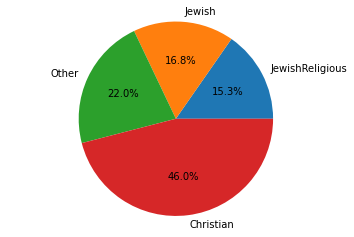

In [21]:
# religionPlot = df.plot.pie(subplots=True, figsize=(11, 11))
Releg_labels = 'JewishReligious','Jewish','Other', 'Christian'
plt.pie(df_relig,labels=Releg_labels ,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [22]:
df_Origin=pd.crosstab(activities.origin,columns="count")
df_Origin = df_Origin.sort_values("count",ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


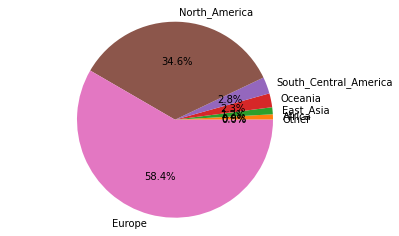

In [23]:
Orig_labels = 'Other','Africa','East_Asia', 'Oceania', 'South_Central_America', 'North_America', 'Europe'
plt.pie(df_Origin,labels=Orig_labels ,autopct='%2.1f%%')
plt.axis('equal')
plt.show()

In [24]:
#dropped act_place from dummies for NN
activities=pd.get_dummies(activities, 
                          columns=["visit_purpose", "religion", "origin", "arrival_season","act_weekday","act_month","act_year","day_category","jerusalem_visiting_category"],
                          prefix=["visit_purpose", "religion", "origin", "arrival_season","act_weekday","act_month","act_year","day_category","jerusalem_visiting_category"])
activities.head()

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one
187,17756,82428,12/26/2015,0,0,1,0,0,1,12/16/2015,12,11,53,6,17,22,ירושלים,0,0%,90%,0%,10%,ירושלים,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
188,88059,745377,3/29/2017,0,0,1,0,0,1,3/24/2017,9,8,62,9,60,18,ירושלים,0,0%,0%,100%,0%,רמת הנגב,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
189,173769,1608118,11/2/2017,0,1,1,0,0,1,10/29/2017,9,7,47,10,48,17,ירושלים,0,0%,0%,100%,0%,ים המלח והסביבה,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
190,19669,203378,3/11/2016,0,0,1,0,0,1,3/11/2016,10,10,44,5,65,17,ירושלים,0,0%,0%,91%,9%,NaN,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
191,17593,66039,12/5/2015,0,1,1,0,0,1,12/3/2015,11,11,63,12,6,16,ירושלים,0,100%,0%,0%,0%,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1


In [25]:
#activities.corr()

In [26]:
df=activities[['act_name','act_duration']]
df.sort_values(by='act_duration',ascending=True).head(2000)

,act_name,act_duration
27459,0,6
10177,0,6
29340,0,6
25746,0,6
12016,0,6
...,...,...
4857,0,21
12663,0,21
24288,0,21
8300,0,21


####leave only data that each turist came for more then 4 days and had at least 5 activities during the visit 

In [27]:
activities = activities.loc[activities['total_visit_days'] >= 4]
activities = activities.loc[activities['total_act'] >= 5]

activities.shape

(7016, 69)

# Outliers check and removal

In [28]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [29]:
#check for outliers 
fig = go.Figure()
fig.add_trace(go.Box(name='total_visit_days', y = activities.total_visit_days , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()


fig = go.Figure()
fig.add_trace(go.Box(name='total_act_days', y = activities.total_act_days , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(name='total_act', y = activities.total_act , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()


fig = go.Figure()
fig.add_trace(go.Box(name='act_per_day', y = activities.act_per_day , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(name='act_duration', y = activities.act_duration , boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

In [30]:
def get_outliers(df, series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)

  if q1*q3 == 0:
    iqr = abs(2*(q1+q3))
    toprange = iqr
    botrange = -toprange
  else:
    iqr = q3-q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5

  outliers_top=df[series > toprange]
  outliers_bot= df[series < botrange]
  outliers = pd.concat([outliers_bot, outliers_top], axis=0)

  return (botrange, toprange, outliers)

In [31]:
act_duration_botrange, act_duration_toprange, act_duration_outliers = get_outliers(activities, activities.act_duration)
print("act_duration col top range = ", act_duration_toprange)
print("act_duration col bottom range = ",act_duration_botrange)

print(act_duration_outliers['act_duration'])

act_duration col top range =  176.5
act_duration col bottom range =  -75.5
211      237
3603     294
4072     190
4104     317
4138     328
        ... 
28454    215
28567    190
28672    201
30295    312
30298    338
Name: act_duration, Length: 406, dtype: int64


In [32]:
#total_visit_days, total_act_days ,total_act,act_per_day, act_duration
total_visit_days_botrange, total_visit_days_toprange, total_visit_days_outliers = get_outliers(activities, activities.total_visit_days)
total_act_days_botrange, total_act_days_toprange, total_act_days_outliers = get_outliers(activities, activities.total_act_days)
total_act_botrange, total_act_toprange, total_act_outliers = get_outliers(activities, activities.total_act)
act_per_day_botrange, act_per_day_toprange, act_per_day_outliers = get_outliers(activities, activities.act_per_day)


print("total_visit_days col top range = ", total_visit_days_toprange)
print("total_visit_days col bottom range = ",total_visit_days_botrange)

print("total_act_days col top range = ", total_act_days_toprange)
print("total_act_days col bottom range = ",total_act_days_botrange)

print("total_act col top range = ", total_act_toprange)
print("total_act col bottom range = ",total_act_botrange)

print("act_per_day col top range = ", act_per_day_toprange)
print("act_per_day col bottom range = ",act_per_day_botrange)

total_visit_days col top range =  19.5
total_visit_days col bottom range =  -0.5
total_act_days col top range =  18.5
total_act_days col bottom range =  -1.5
total_act col top range =  100.625
total_act col bottom range =  -12.375
act_per_day col top range =  17.5
act_per_day col bottom range =  -2.5


###Drop all the outliers we found

In [33]:
total_visit_days_index_list = [i for i in activities.index if i not in total_visit_days_outliers.index]
total_act_days_index_list = [i for i in activities.index if i not in total_act_days_outliers.index]
total_act_index_list = [i for i in activities.index if i not in total_act_outliers.index]
act_per_day_index_list = [i for i in activities.index if i not in act_per_day_outliers.index]


no_outliers_df = activities.loc[total_visit_days_index_list]
no_outliers_df = activities.loc[total_act_days_index_list]
no_outliers_df = activities.loc[total_act_index_list]
no_outliers_df = activities.loc[act_per_day_index_list]


no_outliers_df.reset_index(inplace=True, drop=True)
activities=no_outliers_df

###standard normalization for numeric columns

In [34]:
#standard normalization for numeric columns

mean=activities.total_visit_days.mean()
activities.total_visit_days-=mean
std=activities.total_visit_days.std()
activities.total_visit_days/=std

mean=activities.total_act_days.mean()
activities.total_act_days-=mean
std=activities.total_act_days.std()
activities.total_act_days/=std

mean=activities.total_act.mean()
activities.total_act-=mean
std=activities.total_act.std()
activities.total_act/=std

mean=activities.act_per_day.mean()
activities.act_per_day-=mean
std=activities.act_per_day.std()
activities.act_per_day/=std

mean=activities.act_duration.mean()
activities.act_duration-=mean
std=activities.act_duration.std()
activities.act_duration/=std

- above 90% of the places are in the tail 100 of the data according to act_place column
- jerusalem is more than 30% of the records

In [35]:
activities.shape

(6939, 69)

In [36]:
#activities.columns

In [37]:
# convert string % to float values
activities['organized_transportation_precent'] = activities['organized_transportation_precent'].str.rstrip('%').astype('float') / 100.0
activities['taxi_precent'] = activities['taxi_precent'].str.rstrip('%').astype('float') / 100.0
activities['private_vehicle_precent'] = activities['private_vehicle_precent'].str.rstrip('%').astype('float') / 100.0
activities['public_tranport_precent'] = activities['public_tranport_precent'].str.rstrip('%').astype('float') / 100.0

###add the last 2 places column the turist was in befor the current activities 

In [38]:
#the column "is_1st_act_of_the_day" not show correct values because we delete on the data preparation some records, and that is why we put 1 at the 1st act for each tourist_id and put 0 in the column "is_act_during_the_day"

activities["act_name_before"] = activities.groupby(['tourist_id'])['act_name'].shift(1)
activities["act_name_before"]=np.where(activities['act_name_before'].isnull(),16,activities.act_name_before)
activities["is_first_act_of_day"]=np.where(activities['act_name_before']==16 ,1,0)
activities["is_act_during_day"]=np.where(activities['is_first_act_of_day']==1 ,0,activities.is_act_during_day)

activities["act_name_before2"] = activities.groupby(['tourist_id'])['act_name'].shift(2)
activities["act_name_before2"]=np.where(activities['act_name_before2'].isnull(),16,activities.act_name_before2)

In [39]:
activities.head(5)

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_name_before,act_name_before2
0,17756,82428,12/26/2015,0,0,1,1,0,0,12/16/2015,0.854340,0.751194,0.384175,-0.504380,-0.737533,22,ירושלים,0,0.0,0.9,0.00,0.10,ירושלים,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,16,16
1,88059,745377,3/29/2017,0,0,1,1,0,0,3/24/2017,-0.124191,-0.231376,0.839538,0.405156,-0.029049,18,ירושלים,0,0.0,0.0,1.00,0.00,רמת הנגב,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,16,16
2,173769,1608118,11/2/2017,0,1,1,1,0,0,10/29/2017,-0.124191,-0.558899,0.080600,0.708334,-0.226766,17,ירושלים,0,0.0,0.0,1.00,0.00,ים המלח והסביבה,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,16,16
3,19669,203378,3/11/2016,0,0,1,1,0,0,3/11/2016,0.201986,0.423670,-0.071187,-0.807559,0.053333,17,ירושלים,0,0.0,0.0,0.91,0.09,NaN,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,16,16
4,17593,66039,12/5/2015,0,1,1,1,0,0,12/3/2015,0.528163,0.751194,0.890134,1.314691,-0.918773,16,ירושלים,0,1.0,0.0,0.00,0.00,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,16,16


###change the activities hour column to dummy 

In [40]:
activities[['act_start_hour_morning','act_start_hour_afternoon','act_start_hour_evening','act_start_hour_night']] = np.NaN

activities['act_start_hour_morning'] = np.where((activities['act_start_hour'] >= 5) & (activities['act_start_hour'] <= 12) , 1, 0)
activities['act_start_hour_afternoon'] = np.where((activities['act_start_hour'] > 12) & (activities['act_start_hour'] <= 18) , 1, 0)
activities['act_start_hour_evening'] = np.where((activities['act_start_hour'] > 18) & (activities['act_start_hour'] <= 24) , 1, 0)
activities['act_start_hour_night'] = np.where((activities['act_start_hour'] >= 0) & (activities['act_start_hour'] < 5) , 1, 0)


In [41]:
activities.head()

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_name_before,act_name_before2,act_start_hour_morning,act_start_hour_afternoon,act_start_hour_evening,act_start_hour_night
0,17756,82428,12/26/2015,0,0,1,1,0,0,12/16/2015,0.854340,0.751194,0.384175,-0.504380,-0.737533,22,ירושלים,0,0.0,0.9,0.00,0.10,ירושלים,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,16,16,0,0,1,0
1,88059,745377,3/29/2017,0,0,1,1,0,0,3/24/2017,-0.124191,-0.231376,0.839538,0.405156,-0.029049,18,ירושלים,0,0.0,0.0,1.00,0.00,רמת הנגב,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,16,16,0,1,0,0
2,173769,1608118,11/2/2017,0,1,1,1,0,0,10/29/2017,-0.124191,-0.558899,0.080600,0.708334,-0.226766,17,ירושלים,0,0.0,0.0,1.00,0.00,ים המלח והסביבה,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,16,16,0,1,0,0
3,19669,203378,3/11/2016,0,0,1,1,0,0,3/11/2016,0.201986,0.423670,-0.071187,-0.807559,0.053333,17,ירושלים,0,0.0,0.0,0.91,0.09,NaN,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,16,16,0,1,0,0
4,17593,66039,12/5/2015,0,1,1,1,0,0,12/3/2015,0.528163,0.751194,0.890134,1.314691,-0.918773,16,ירושלים,0,1.0,0.0,0.00,0.00,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,16,16,0,1,0,0


# Adding columns to indicate if the tourist had been in every place before

In [42]:
tourists_ids=activities.tourist_id.unique()
activities_ids=activities.act_id.unique()

#Create a dictionary to save the activities by ID 
ls={} 
for i in range(len(tourists_ids)):
  tmp=activities["act_name"].loc[activities["tourist_id"]==tourists_ids[i]]   
  if len(tmp) >= 3: 
    ls[str(tourists_ids[i])]=tmp.to_numpy()

In [43]:
ls.values()

dict_values([array([0, 0, 0], dtype=object), array([0, 0, 0, 0, 0], dtype=object), array([0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 2], dtype=object), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object), array([0, 3, 0, 0, 0, 0], dtype=object), array([0, 0, 0, 0, 0, 1], dtype=object), array([0, 0, 0, 1], dtype=object), array([0, 0, 0, 0], dtype=object), array([0, 0, 0, 0], dtype=object), array([0, 0, 0, 0, 3, 0, 0, 2], dtype=object), array([0, 0, 0, 0, 0, 0], dtype=object), array([0, 0, 0, 0], dtype=object), array([0, 0, 0, 0, 0], dtype=object), array([0, 0, 0], dtype=object), array([0, 0, 0, 0, 0, 0], dtype=object), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object), array([0, 0, 0, 0, 4, 0, 0, 2, 0, 0], dtype=object), array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object), array([0, 0, 1], dtype=object), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=object), array([0, 0, 0, 0, 0, 0], dtype=object), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

###add dummy columns for check where is the place the turist was (not neccesarly the last 2 activities)


In [44]:
g = activities.groupby("tourist_id")
for c in activities["act_name"].unique():
    activities["was_in_{}".format(c)] = g["act_name"].transform(
        lambda x: (x == c)
        .shift()
        .replace(False, np.nan)
        .ffill()
        .fillna(0)
        .astype(int)
    )

print(activities)


      tourist_id   act_id    act_date  ... was_in_1 was_in_3 was_in_2
0          17756    82428  12/26/2015  ...        0        0        0
1          88059   745377   3/29/2017  ...        0        0        0
2         173769  1608118   11/2/2017  ...        0        0        0
3          19669   203378   3/11/2016  ...        0        0        0
4          17593    66039   12/5/2015  ...        0        0        0
...          ...      ...         ...  ...      ...      ...      ...
6934       17728    97317  12/19/2015  ...        0        0        0
6935       19762   211296   3/15/2016  ...        0        0        0
6936       24935   512761  11/15/2016  ...        0        0        0
6937       21490   335202    6/8/2016  ...        0        0        0
6938       87048   736864   3/22/2017  ...        0        0        0

[6939 rows x 80 columns]


In [45]:
activities.head(10)

,tourist_id,act_id,act_date,act_name,is_first_visit,is_long_visit,is_first_act_of_day,is_last_act_of_day,is_act_during_day,arrival_date,total_visit_days,total_act_days,total_act,act_per_day,act_duration,act_start_hour,act_place,is_organized_day_trip,organized_transportation_precent,taxi_precent,private_vehicle_precent,public_tranport_precent,accomodation_place,visit_purpose_Family&Friends,visit_purpose_Travel&Religion,visit_purpose_business,religion_Christian,religion_Jewish,religion_JewishReligious,religion_Other,origin_Africa,origin_East_Asia,origin_Europe,origin_North_America,origin_Oceania,origin_Other,origin_South_Central_America,arrival_season_Christmas,arrival_season_Spring,arrival_season_Summer,arrival_season_Tishrei_Holidays,arrival_season_Winter,act_weekday_Friday,act_weekday_Monday,act_weekday_Saturday,act_weekday_Sunday,act_weekday_Thursday,act_weekday_Tuesday,act_weekday_Wednesday,act_month_1,act_month_2,act_month_3,act_month_4,act_month_5,act_month_6,act_month_7,act_month_8,act_month_9,act_month_10,act_month_11,act_month_12,act_year_2015,act_year_2016,act_year_2017,day_category_First_Day,day_category_Last_Day,day_category_Normal_Day,jerusalem_visiting_category_1,jerusalem_visiting_category_More_than_one,act_name_before,act_name_before2,act_start_hour_morning,act_start_hour_afternoon,act_start_hour_evening,act_start_hour_night,was_in_0,was_in_4,was_in_1,was_in_3,was_in_2
0,17756,82428,12/26/2015,0,0,1,1,0,0,12/16/2015,0.854340,0.751194,0.384175,-0.504380,-0.737533,22,ירושלים,0,0.00,0.90,0.00,0.10,ירושלים,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,16,16,0,0,1,0,0,0,0,0,0
1,88059,745377,3/29/2017,0,0,1,1,0,0,3/24/2017,-0.124191,-0.231376,0.839538,0.405156,-0.029049,18,ירושלים,0,0.00,0.00,1.00,0.00,רמת הנגב,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,16,16,0,1,0,0,0,0,0,0,0
2,173769,1608118,11/2/2017,0,1,1,1,0,0,10/29/2017,-0.124191,-0.558899,0.080600,0.708334,-0.226766,17,ירושלים,0,0.00,0.00,1.00,0.00,ים המלח והסביבה,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,16,16,0,1,0,0,0,0,0,0,0
3,19669,203378,3/11/2016,0,0,1,1,0,0,3/11/2016,0.201986,0.423670,-0.071187,-0.807559,0.053333,17,ירושלים,0,0.00,0.00,0.91,0.09,NaN,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,16,16,0,1,0,0,0,0,0,0,0
4,17593,66039,12/5/2015,0,1,1,1,0,0,12/3/2015,0.528163,0.751194,0.890134,1.314691,-0.918773,16,ירושלים,0,1.00,0.00,0.00,0.00,ירושלים,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,16,16,0,1,0,0,0,0,0,0,0
5,173769,1608131,11/3/2017,0,1,1,0,0,1,10/29/2017,-0.124191,-0.558899,0.080600,0.101977,-0.523340,17,ירושלים,0,0.00,0.00,0.00,1.00,ירושלים,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,16,0,1,0,0,1,0,0,0,0
6,18500,140093,1/28/2016,0,0,1,1,0,0,1/28/2016,-1.102721,-1.213946,-1.892637,-1.110737,-0.210289,13,ירושלים,0,0.49,0.51,0.00,0.00,NaN,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,16,16,0,1,0,0,0,0,0,0,0
7,173769,1608117,11/2/2017,0,1,1,0,0,1,10/29/2017,-0.124191,-0.558899,0.080600,0.708334,2.887268,13,ירושלים,0,0.00,0.00,1.00,0.00,ים המלח והסביבה,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
8,163155,1599281,10/28/2017,0,1,1,1,0,0,10/26/2017,0.854340,0.751194,1.750263,-0.504380,-0.770486,14,ירושלים,0,0.00,0.00,0.00,1.00,תל אביב יפו,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,16,16,0,1,0,0,0,0,0,0,0
9,173769,1608130,11/3/2017,0,1,1,0,0,1,10/29/2017,-0.124191,-0.558899,0.080600,0.101977,-0.342100,16,ירושלים,0,0.00,0.00,0.00,1.00,ירושלים,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0


####The LSTM model will learn a function that maps a sequence of past observations as input to an output observation. As such, the sequence of observations must be transformed into multiple examples from which the LSTM can learn.

In [46]:
def split_sequence(sequence, n_steps):
	_X, _y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		_X.append(seq_x)
		_y.append(seq_y)
	return np.array(_X), np.array(_y)

In [47]:
y=[]
X=[]

arr=np.array(list(ls.values()))

for k in range(len(arr)):
# define input sequence
  raw_seq =arr[k]
# choose a number of time steps
  n_steps = 3
# split into samples
  Xtmp, ytmp = split_sequence(raw_seq, n_steps)
# summarize the data
  for i in range(len(Xtmp)):
    X.append(Xtmp[i])
    y.append(ytmp[i])


for i in range(len(X)):
  print(X[i], y[i])

[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 4
[0 0 4] 4
[0 4 4] 0
[4 4 0] 0
[4 0 0] 0
[0 0 0] 2
[0 0 2] 2
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 3 0] 0
[3 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 1
[0 0 0] 1
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 3
[0 0 3] 0
[0 3 0] 0
[3 0 0] 2
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 4
[0 0 4] 0
[0 4 0] 0
[4 0 0] 2
[0 0 2] 0
[0 2 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 1
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 2
[0 0 2] 0
[0 2 0] 0
[2 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 1
[0 0 1] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 2
[0 0 2] 0
[0 2 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 4
[0 0 4] 0
[0 4 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 3
[0 0 0] 3
[0 0 3] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 3
[0 0 3] 0
[0 3 0] 0
[3 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 0
[0 0 0] 2
[0 0 2] 0
[0 2 0] 0
[0 0 0] 0
[0 0 0] 0


In [48]:
#ls holds dictionary of 5 first places the tourist visited

# for i in range(len(arr)):
#   y.append(arr[i][4:5])
#   X.append(arr[i][:4])

y=np.array(y).astype('float32')
X=np.array(X).astype('float32')
print(X.shape)

X=X.reshape(X.shape[0],X.shape[1],1)

from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)
partial_train_data, val_data, partial_train_targets, val_targets = train_test_split(train_data, train_targets, test_size=0.2, random_state=123*k)

(3401, 3)


In [49]:
print(y.shape)

(3401,)


##Build and run the LSTM Neural Network 

In [50]:
import keras 
from keras.layers import LSTM

In [51]:
from tensorflow.keras.utils import to_categorical
train_targets = to_categorical(train_targets)
test_targets=to_categorical(test_targets)
partial_train_targets = to_categorical(partial_train_targets)
val_targets=to_categorical(val_targets)


In [52]:
print('train_targets: ',train_targets.shape)
print('test_targets: ',test_targets.shape)
print('partial_train_targets: ',partial_train_targets.shape)
print('val_targets: ',val_targets.shape)

train_targets:  (2720, 5)
test_targets:  (681, 5)
partial_train_targets:  (2176, 5)
val_targets:  (544, 5)


In [53]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
# define model
model = keras.Sequential()
model.add(LSTM(128, activation='sigmoid',return_sequences=True,input_shape=(n_steps, n_features)))
model.add(keras.layers.Dropout(0.4))
model.add(LSTM(64,activation='sigmoid',return_sequences=True,input_shape=(n_steps, n_features)))
model.add(keras.layers.Dropout(0.3))
model.add(LSTM(64,activation='sigmoid'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

# fit model

history=model.fit(partial_train_data,
                  partial_train_targets,
                  epochs=140,
                  batch_size=150,
                  validation_data=(val_data,val_targets))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 128)            66560     
_________________________________________________________________
dropout (Dropout)            (None, 3, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 64)             49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3

In [54]:
val_loss, val_acc= model.evaluate(val_data,val_targets,verbose=0)

In [55]:
print("validation acc: ", val_acc)
print("validation loss: ",val_loss)

validation acc:  0.8308823704719543
validation loss:  0.6240984201431274


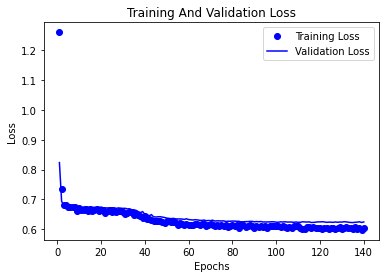

In [56]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

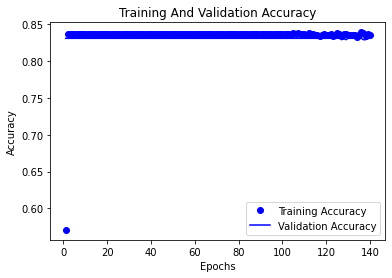

In [57]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [58]:
test_loss, test_acc = model.evaluate(test_data, test_targets)

22/22 [==============================] - 0s 4ms/step - loss: 0.6038 - acc: 0.8326


In [59]:
print("test acc: ",test_acc)
print("test loss: ",test_loss)

test acc:  0.8325991034507751
test loss:  0.6037529110908508


In [60]:
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
def to_classes(arr):
  rows, cols = (arr.shape[0],arr.shape[1]) 
  result=np.zeros(arr.shape[0],)
  max=0
  index=0
  for i in range(rows):
    for j in range(cols):
      if arr[i][j]>max:
           max=arr[i][j]
           index=j
    result[i]=index
    max=0 
  return result

In [62]:
test_pred= model.predict(test_data,verbose=0)
test_pred_classes=to_classes(test_pred)
test_targets_classes=to_classes(test_targets)
#print(val_pred_classes.shape,val_targets_classes.shape)
#print(val_pred_classes,val_targets_classes)
#print(confusion_matrix(test_targets_classes,test_pred_classes,normalize='all'))
report = classification_report(test_targets_classes, test_pred_classes)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       570
         1.0       0.00      0.00      0.00        44
         2.0       0.00      0.00      0.00        24
         3.0       0.00      0.00      0.00        30
         4.0       0.00      0.00      0.00        13

    accuracy                           0.83       681
   macro avg       0.17      0.20      0.18       681
weighted avg       0.70      0.83      0.76       681



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

